# Hometask №1 
## by Anton Kondrashov
##### HSE, CS, BSE 141(1)

## Questions and tasks
1. How many males and females are there?

2. What is the mean male age?

3. What is the proportion of the US citizens?

4. Plot the distribution of people’s education as a bar plot.

5. What is the mean and standard deviation of the "final weight"(fnlwgt) for divorced people?

6. Is it true that the people who receive over 50k are mostly highly educated?

7. What is the maximum male and female age for each race?

8. The people from which countries work as farmers/fishers?

9. Consider the ratio of the number of 
        1) male bachelors to male masters, and 
        2) female bachelors to female masters. 
   Which one is higher?

10. What is the largest number of hours a person works a week? 
    How many people who work this number of hours are there? 
    What is their income (salary)?

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle, islice # lib for colors
%matplotlib inline

In [28]:
#Import the data
data = pd.read_csv('adult.data.csv')

In [29]:
#Check what's imported
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
1,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
2,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
3,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
4,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
5,38,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
6,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
7,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
8,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
9,35,Federal-gov,76845,9th,5,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,United-States,<=50K


# 1

In [55]:
males = data[data['sex']=='Male']
females = data[data['sex']=='Female']

print('Number of males is ' + str(males.shape[0]))
print('Number of females is ' + str(females.shape[0]))

Number of males is 21782
Number of females is 10766


# 2

In [31]:
print('Mean male age is ' + str(data[data['sex']=='Male']['age'].mean()))

Mean male age is 39.432375355798364


# 3

In [32]:
proportion = data[data['native-country']=='United-States'].shape[0] / data.shape[0] * 100.0 
print('Proportion of the US citizens is ' + str(proportion) + '%' )

Proportion of the US citizens is 89.59075826471673%


# 4

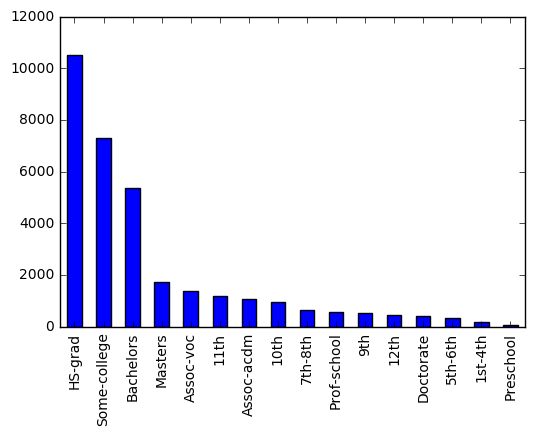

In [157]:
data['education'].value_counts().plot(kind='bar')

# 5

In [48]:
mean = data[data['marital-status'] == 'Divorced']['fnlwgt'].mean()
std = data[data['marital-status'] == 'Divorced']['fnlwgt'].std()

print('Mean is ' + str(mean))
print('Standard deviation is ' + str(std))

Mean is 185796.0720396218
Standard deviation is 105657.73403454771


# 6

In [86]:
data[data['salary']=='>50K']['education'].value_counts()

Bachelors       2219
HS-grad         1674
Some-college    1386
Masters          958
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

### Considering the distribution shown above one can say that proposed statement was true because most of the highly payed people have at least finished high school. Even more of them have some university or college degree.

# 7

In [156]:
male_max_ages = males.groupby('race')['age'].max()
female_max_ages = females.groupby('race')['age'].max()

print('Male max ages are: \n' + str(male_max_ages.to_frame()) + '\n')
print('Female max ages are: \n' + str(female_max_ages.to_frame()))

Male max ages are: 
                    age
race                   
Amer-Indian-Eskimo   82
Asian-Pac-Islander   90
Black                90
Other                77
White                90

Female max ages are: 
                    age
race                   
Amer-Indian-Eskimo   80
Asian-Pac-Islander   75
Black                90
Other                74
White                90


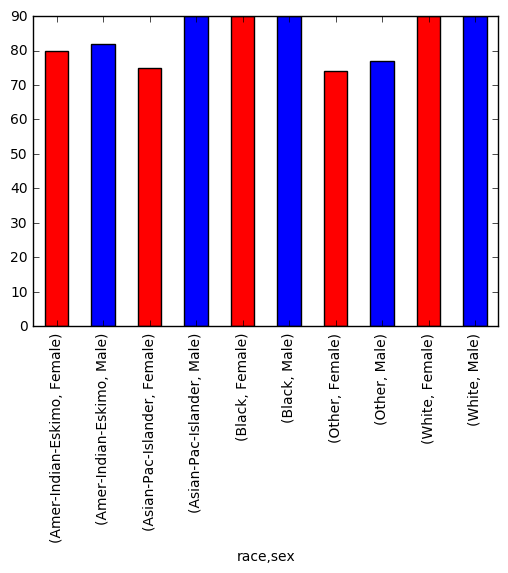

In [155]:
#Let's show it on one plot

common_data = data.groupby(['race','sex'])['age'].max()
colors = list(islice(cycle(['r', 'b']), None, len(common_data)))
common_data.plot(kind='bar', stacked=True, color=colors)

### Maximum longevity is among males of all races. White and black people live most and maximum longivity of both males and females of this races equals 90 years. Male Asian-Pac-Islanders have the same maximum.

# 8

               native-country
United-States             879
Mexico                     77
Puerto-Rico                 5
?                           5
Guatemala                   4
Philippines                 4
Vietnam                     2
Canada                      2
Italy                       2
El-Salvador                 2
Cuba                        2
Hong                        1
Cambodia                    1
Portugal                    1
Germany                     1
Japan                       1
Ireland                     1
England                     1
Yugoslavia                  1
Poland                      1
France                      1


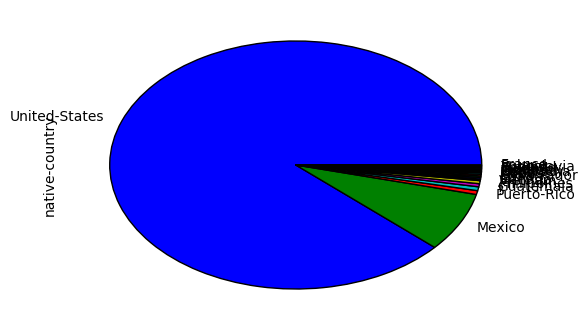

In [132]:
farmers_fishers = data[data['occupation']=='Farming-fishing']['native-country'].value_counts()
print(farmers_fishers.to_frame())

#Let's plot to see the proportions
farmers_fishers.plot(kind='pie')

### As we see from ugly pie-chart most farmers/fishers are from US ans Mexico. Some of them are also from the countries mentioned in the list above.

# 9

In [96]:
#Calculate ratios
male_batchelors = males[males['education']=='Bachelors'].shape[0]
male_masters = males[males['education']=='Masters'].shape[0]

female_batchelors = females[females['education']=='Bachelors'].shape[0]
female_masters = females[females['education']=='Masters'].shape[0]

#Output
print('Male ratio is ' + str(float(male_masters)/male_batchelors))
print('Female ratio is ' + str(float(female_masters)/female_batchelors))

Male ratio is 0.31806002143622725
Female ratio is 0.3302411873840445


### Proportion of women who continue education until Masters degree is a little higher. Probably that's because of social reasons and stereotypes due to which men sometimes start working earlier.

# 10

In [102]:
print('Max number a person works per week is ' + str(data['hours-per-week'].max())+ ' hours')

Max number a person works per week is 99 hours


In [106]:
count = data[data['hours-per-week']==99].shape[0]
print('Number of people working this much is ' + str(count))

Number of people working this much is 85


In [129]:
#Who gets what
data[data['hours-per-week']==99]['salary'].value_counts().to_frame()

,salary
<=50K,60
>50K,25


> # Only about 30% of hard-workers get much better salaries!!!